# Introduction to the dataset

## Artisanal Mining site data from IPIS

IPIS adalah International Peace Information Service. IPIS mengumpulkan data lokasi penambangan masyarakatm mineral yang ditambang dan situasi sosial dan keamanan di Kongo, Afrika Tengah. IPIS kemudian megolah data tersebut dan ditampilkan ke dalam web peta interaktif berbasis open source. Tujuan dari proyek ini adalah untuk lebih memahami peranan tambang dalam konlfik yang terjadi di wilayah tersebut. 

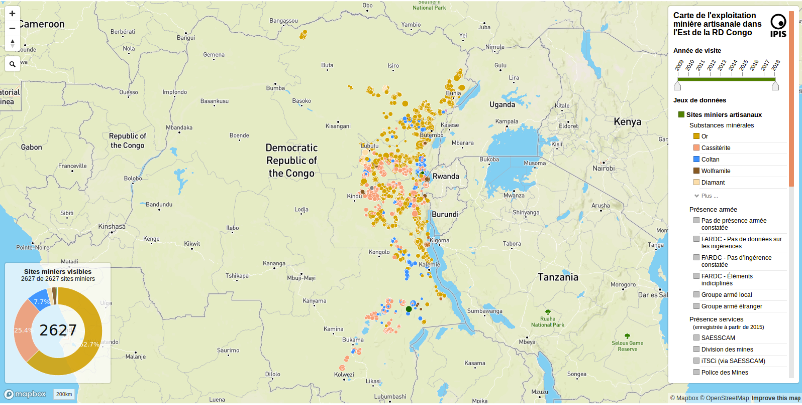

## Geospatial File Formats

Beberapa jenis file dalam format geospasial,
1. **ESRI shapefile**, format data vektor yang paling banyak digunakan. Namun terlepas dari popularitasnya format ini memiliki beberapa kelemahan salah satunya yaitu format multi-file jadi jika ingin menggunakan shapefile pastikan semua format dalam satu file lengkap. 
2. **GeoJSON**, format data spasial berbasis JSON file dan sering digunakan dalam aplikasi web. 
3. **GeoPackage**, format open source yang relatif baru dan lebih canggih karena dapat digunakan dalam banyak hal dan alternatif shapefile
4. **PostGIS** database

## Writing to Geospatial File Formats

Geopandas dapat membaca melalui method `.to_file()` dan menulis format file geospatial `.to_file()` melalui GDAL library 

- writing a shapefile file
        
        *gdf.to_file('mydata.shp', driver = 'ESRI Shapefile')
        
- writing a GeoJSON file

        
        *gdf.to_file('mydata.geojson', driver = 'GeoJSON')
        
- writing a GeoPackage file

        
        *gdf.to_file('mydata.gpkg', driver = 'GPKG')

**Import and explore the data**

In this exercise, we will start with reading and exploring two new datasets:

First, a dataset on artisanal mining sites in Eastern Congo (adapted from IPIS open data).
Second, a dataset on the national parks in Congo (adapted from the World Resources Institute).
For each of those datasets, the exercise consists of importing the necessary packages, reading the data with geopandas.read_file(), inspecting the first 5 rows and the Coordinate Reference System (CRS) of the data, and making a quick visualization.

- Read and explore the mining site data ("ipis_cod_mines.geojson"), assigning it to a variable called mining_sites.

In [3]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
mining_sites = geopandas.read_file("dataset/ipis_cod_mines.geojson")

In [4]:
# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4  POINT (29.66000 0.95600)  
EPSG:4326


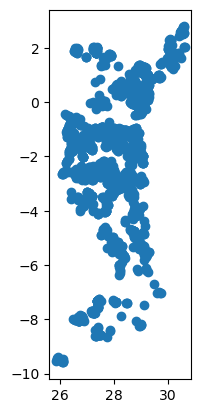

In [5]:
# Make a quick visualisation
mining_sites.plot()
plt.show()

- Adapt your code to do the same for the national park data ("cod_conservation.shp", assign to a variable national_parks).

In [8]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the national park data
national_parks = geopandas.read_file("dataset/Conservation/RDC_aire_protegee_2013.shp")

In [9]:
# Print the first rows and the CRS information
print(national_parks.head())
print(national_parks.crs)

     SCE_SEM    SCE_GEO       DATE_             ORIGINE  \
0    WWF/RDC    WWF/RDC  2007-04-18  GPS / Numérisation   
1  WWF/EARPO  WWF/EARPO  2007-04-18  GPS / Numérisation   
2     SYGIAP     SYGIAP  2007-04-18  GPS / Numérisation   
3     SYGIAP     SYGIAP  2007-04-18  GPS / Numérisation   
4     SYGIAP     SYGIAP  2007-04-18  GPS / Numérisation   

                               NOM             REGLEMENT VALID        Statut  \
0  Réserve de biosphère de la Luki  Réserve de biosphère   oui          Créé   
1      Réserve naturelle d'Itombwe     Réserve naturelle   oui          Créé   
2        Réserve de faune à Okapis     Réserve naturelle   oui  Opérationnel   
3      Parc National de la Salonga         Parc National   oui  Opérationnel   
4      Parc National de la Salonga         Parc National   oui  Opérationnel   

      Shape_Leng  Categorie  ...        TYPE2_AP                 NAME_AP  \
0  133507.042122          0  ...  Nature Reserve  Luki Biosphere Reserve   
1  726569.15

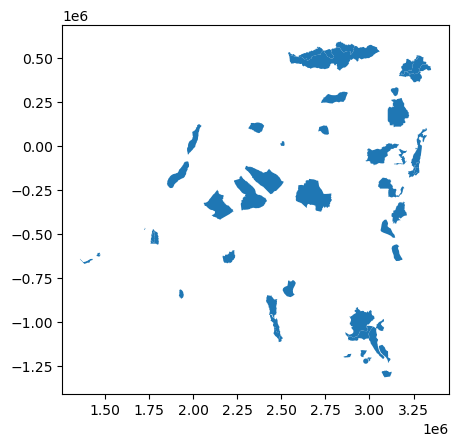

In [10]:
# Make a quick visualisation
national_parks.plot()
plt.show()

> Nice! Did you look at the CRS of both datasets? For the mining sites, it indicated EPSG:4326, so the dataset is expressed in geographical longitude/latitude. The last dataset, the national parks, is in projected coordinates. So we will need to make sure both datasets are in the same CRS to be able to use them together.

**Convert to common CRS and save to a file**

As we have seen in the previous exercises, both datasets are using a different Coordinate Reference System (CRS). This is also illustrated by the first plot in this exercise (for which the code is already provided in the script): both datasets are about the same region, so they should normally overlap in their coordinates; but they don't.

For further analyses in the rest of this chapter, we will convert both datasets to the same CRS, and save both to a new file. To ensure we can do distance-based calculations, we will convert them to a projected CRS: the local UTM zone 35, which is identified by EPSG:32735 (https://epsg.io/32735).

The mining sites (mining_sites) and national parks (national_parks) datasets are already loaded, and GeoPandas and matplotlib are imported.

- Convert both datasets (mining_sites and national_parks) to EPSG:32735. Name the results mining_sites_utm and national_parks_utm.
- Try again to visualize both datasets on a single map. Do both datasets now overlap?

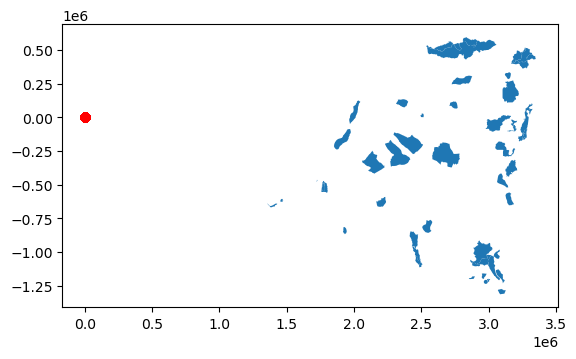

In [11]:
# Plot the natural parks and mining site data
ax = national_parks.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

In [12]:
# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

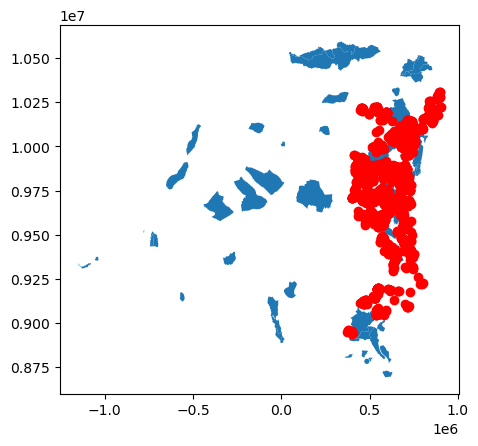

In [13]:
# Plot the converted data again
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()

- Write mining_sites_utm to a GeoPackage file called "ipis_cod_mines_utm.gpkg" and write national_parks_utm to an ESRI Shapefile called "cod_conservation_utm.shp".

In [15]:
# Read the mining site data
mining_sites = geopandas.read_file("dataset/ipis_cod_mines.geojson")
national_parks = geopandas.read_file("dataset/Conservation/RDC_aire_protegee_2013.shp")

In [16]:
# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

In [17]:
# Write converted data to a file
mining_sites_utm.to_file("ipis_cod_mines_utm.gpkg", driver='GPKG')
national_parks_utm.to_file("cod_conservation_utm.shp", driver='ESRI Shapefile')

> Great! You have written your first geospatial files! Let's now use those converted data in the next exercises.

**Styling a multi-layered plot**

Now we have converted both datasets to the same Coordinate Reference System, let's make a nicer plot combining the two.

The datasets in UTM coordinates as we saved them to files in the last exercise are read back in and made available as the mining_sites and national_parks variables. GeoPandas and matplotlib are already imported.

- Edit the code to plot the national parks as green polygons and the mining sites as small dots (a marker size of 5).

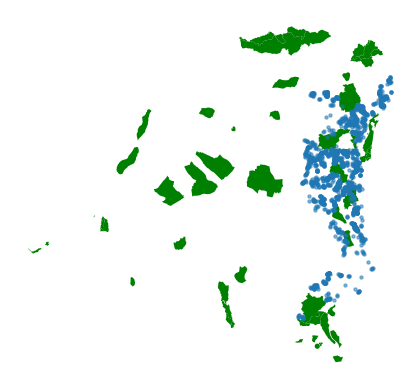

In [21]:
# Plot of the parks and mining sites
ax = national_parks_utm.plot(color='green')
mining_sites_utm.plot(ax=ax, markersize=5, alpha=0.5)
ax.set_axis_off()
plt.show()

- Edit the code to color the points based on the 'mineral' column instead of specifying alpha. Make sure to add a legend.

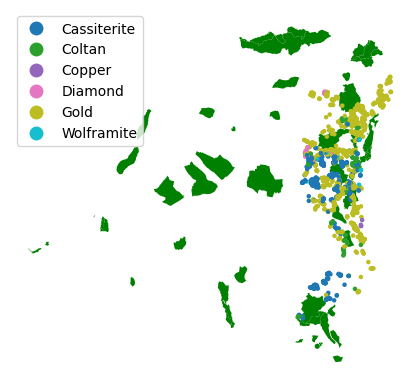

In [22]:
# Plot of the parks and mining sites
ax = national_parks_utm.plot(color='green')
mining_sites_utm.plot(ax=ax, markersize=5, column='mineral', legend=True)
ax.set_axis_off()
plt.show()

> That already looks better! You can do a lot of further tweaking of the figure using matplotlib, but that is out of scope for this course.

# Aditional Spatial Operations

## Overview of Spatial Operations

**1. Spatial relationship, hasil dari uji hubungan spasial akan menghasilakan boolean,**
- Intersects
- Within
- Contains
- ....

**2. Geometry operations, metode untuk membuat geometri baru,**
- intersection
- union
- difference

**3. Join atribut berdasarkan hubungan spasial, fungsi .sjoin yang digunakan untuk menggabungkan informasi atribut berdasarkan hubungan spasial yang diberikan**
- geopandas.sjoin

**4. Combine dataset berdasarkan operasi geometri**
- geopandas.overlay

**5. Unary Union** 
- unary union adalah pengubahan series geometrik (GeoSeries) ke single union geometry 
- unary union adalah operasi yang digunakan untuk menggabungkan (union) beberapa geometri menjadi satu geometri tunggal. Perbedaan utama antara operasi unary union dan operasi union biasa adalah bahwa operasi unary union bekerja pada kumpulan geometri dalam satu lapisan data geografis, sedangkan operasi union biasa menggabungkan geometri dari beberapa lapisan data geografis yang berbeda.

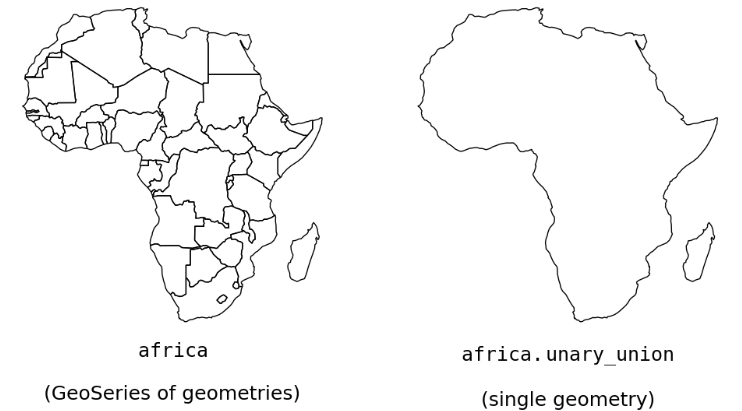

**6. Buffer Operation**
- operasi buffer akan membuat poligon disekitar geometri yang diberikan mencakup semua area dalam jarak tertentu dari geometri asli.
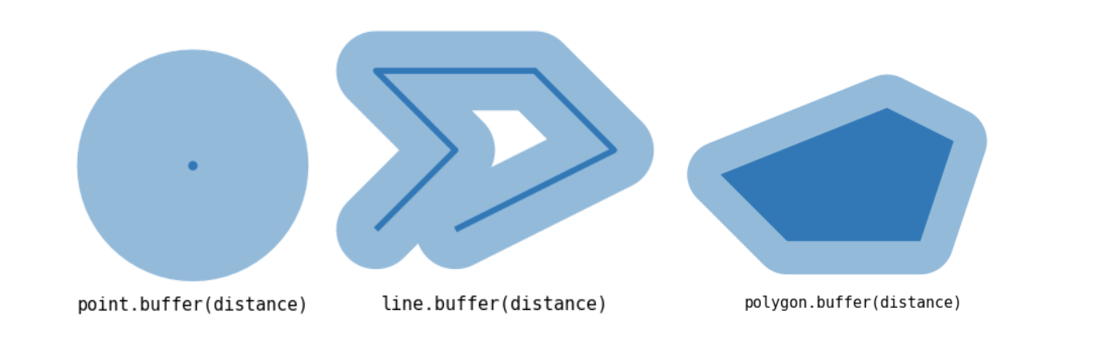

### Exercise 

**Buffer around a point**

Consider the city of Goma, the capital of the North Kivu province of Congo, close to the border with Rwanda. Its coordinates are 1.66°S 29.22°E (the Point is already provided in UTM coordinates as the goma variable).

How many mining sites are located within 50 km of Goma? And how much area of national park? Let's determine that using the buffer operation. Remember that distances should be expressed in the unit of the CRS (i.e. in meter in this case).

Note: if you have a boolean Series (for example as result of a spatial relationship method), then you can calculate how many True values (ie. how many geometries passed the check) by taking the sum of those booleans because in that case the True and False values will be seen as ones and zeros.

- Create a buffer of 50 km around goma, and assign it to a variable goma_buffer.
- Check which of the points of mining_sites are located within this buffer (and call this mask). Count those sites by taking the sum of the boolean mask, and print this result.
- Calculate the intersections of the national parks with the buffer. Take the sum of the area of those intersections, and print the result in km².



In [67]:
goma = Point(746989.5594829298, 9816380.942287602)

In [68]:
type(goma)

shapely.geometry.point.Point

In [69]:
# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

In [70]:
# The buffer is a polygon
print(type(goma_buffer))

<class 'shapely.geometry.polygon.Polygon'>


In [72]:
# Check how many sites are located within the buffer
mask = mining_sites_utm.within(goma_buffer)
print(mask.sum())

87


In [73]:
# Calculate the area of national park within the buffer
print(national_parks_utm.intersection(goma_buffer).area.sum() / (1000**2))

1566.4755911694426


> Nice job! Here, you see some applications of a buffer operation. The "within a certain distance" analysis could also be done by actually calculating all the distances. But depending on the case, using the buffer can be more efficient.

**Mining sites within national parks**

For this exercise, let's start with one of the national parks, the Kahuzi-Biega National park (which was extracted from the national_parks dataset and is provided as the kahuzi variable).

Which of the mining sites are located within this national park?

And as a second step: can we determine all mining sites that are located within one of the national parks and in which park?

The mining sites (mining_sites) and national parks (national_parks) datasets are already loaded, and GeoPandas is already imported.

- Use the within() method to subset the mining sites (mining_sites) located in the kahuzi national park. Call the result sites_kahuzi.
- Determine for each of the mining sites if and in which national park it is located. This will create a GeoDataFrame similar to mining_sites but with an additional column with national park name. Call this result sites_within_park.
- Count the number of sites in each park by using the value_counts() method on the 'Name' column of sites_within_park.



In [86]:
national_parks_utm.head()

,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,...,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry
0,WWF/RDC,WWF/RDC,2007-04-18,GPS / Numérisation,Réserve de biosphère de la Luki,Réserve de biosphère,oui,Créé,133507.042122,0,...,Nature Reserve,Luki Biosphere Reserve,1,0,32968.0,3.105933e+04,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((-1038121.473 9375412.190, -1038053.9..."
1,WWF/EARPO,WWF/EARPO,2007-04-18,GPS / Numérisation,Réserve naturelle d'Itombwe,Réserve naturelle,oui,Créé,726569.150601,0,...,Nature Reserve,Itombwe Nature Reserve,2,0,605000.0,6.009095e+05,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((637994.488 9590686.863, 637948.840 9..."
2,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Réserve de faune à Okapis,Réserve naturelle,oui,Opérationnel,699413.460963,0,...,Nature Reserve,Okapi Faunal Reserve,3,0,1372625.0,1.384674e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((704388.260 10148801.817, 708890.818 ..."
3,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de la Salonga,Parc National,oui,Opérationnel,994020.751122,0,...,National park,Salonga National park,0,0,3600000.0,1.704580e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((-112340.105 9717100.363, -112337.911..."
4,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de la Salonga,Parc National,oui,Opérationnel,867943.914321,0,...,National park,Salonga National park,0,0,0.0,1.612007e+06,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,None,C:\Program Files\Atlas RDC 1.0\Documents\Aires...,"POLYGON ((-97046.374 9846612.024, -96986.183 9..."


In [87]:
# Extract the single polygon for the Kahuzi-Biega National park
kahuzi = national_parks_utm[national_parks_utm['NAME_AP'] == "Kahuzi-Biega National park"].geometry.squeeze()

In [88]:
# Take a subset of the mining sites located within Kahuzi
sites_kahuzi = mining_sites_utm[mining_sites_utm.geometry.within(kahuzi)]
print(sites_kahuzi)

      visit_date                   name  n_workers      mineral  \
661   2013-08-28          Ibozia/Kalumé       80.0  Cassiterite   
662   2013-08-26                Matamba      150.0  Cassiterite   
663   2013-08-27          Mutete/Mukina      170.0  Cassiterite   
664   2013-08-28                 Mutete      100.0  Cassiterite   
760   2014-02-25              Mazankala      120.0  Cassiterite   
813   2015-07-28             Kitendebwa       50.0         Gold   
869   2013-09-28           Sebwa-Lukoma      130.0  Cassiterite   
870   2013-10-30              Rwamakaza      160.0  Cassiterite   
1481  2009-01-01               Mugaba I       50.0         Gold   
1482  2009-01-01           Mugaba Ouest       46.0         Gold   
1676  2015-08-02  Nguba(Nkuba) kamisoke      122.0  Cassiterite   

                            geometry  
661   POINT (567832.709 9759143.339)  
662   POINT (598323.539 9758688.142)  
663   POINT (570733.437 9761871.114)  
664   POINT (569881.093 9762219.111)  


In [89]:
len(sites_kahuzi)

11

In [90]:
# Determine in which national park a mining site is located
sites_within_park = geopandas.sjoin(mining_sites_utm, national_parks_utm, op='within', how='inner')
print(sites_within_park.head())

     visit_date          name  n_workers mineral  \
253  2013-09-05  Kiviri/Tayna      244.0    Gold   
578  2015-09-02   Lubondozi 3       30.0    Gold   
579  2015-09-02        Katamu      180.0    Gold   
580  2015-09-02     Kimabwe 1      120.0    Gold   
581  2015-09-02   Lubondozi 1      300.0    Gold   

                           geometry  index_right   SCE_SEM   SCE_GEO  \
253  POINT (709734.913 9961013.720)           23  CI/DFGFI  CI/DFGFI   
578  POINT (578464.315 9555456.293)           15      ICCN      ICCN   
579  POINT (576249.903 9554313.725)           15      ICCN      ICCN   
580  POINT (576425.777 9556329.634)           15      ICCN      ICCN   
581  POINT (579164.711 9554722.924)           15      ICCN      ICCN   

          DATE_             ORIGINE  ...     Shape_Area        TYPE2_AP  \
253  2007-04-18  GPS / Numérisation  ...   89292.352397  Nature Reserve   
578  2007-04-18        Numérisation  ...  390028.265431  Hunting Domain   
579  2007-04-18        Numéri

C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [92]:
# The number of mining sites in each national park
print(sites_within_park['NAME_AP'].value_counts())

NAME_AP
Itombwe Nature Reserve          21
Luama-Katanga Hunting Domain    14
Kahuzi-Biega National park      11
Luama-Kivu Hunting Domain        9
Okapi Faunal Reserve             5
Maiko National park              3
Tayna Nature Reserve             1
Name: count, dtype: int64


> Great! You can see that quite some mining sites are located in the protected national parks.

# Applying Custom Spatial Operations

### The Apply method

Metode .apply() adalah salah satu metode yang umum digunakan dalam pemrograman Python, terutama dalam pemrograman dengan Pandas atau pustaka seperti NumPy. Metode ini digunakan untuk menerapkan fungsi kustom atau fungsi bawaan pada elemen-elemen dalam objek data seperti DataFrame, Series, atau array.

Dalam konteks Pandas, metode .apply() digunakan untuk menerapkan fungsi ke setiap elemen dalam satu kolom (Series) atau di seluruh DataFrame. Metode ini memungkinkan Anda untuk melakukan pemrosesan data yang lebih kompleks atau pengubahan data berdasarkan aturan kustom Anda.

Berikut adalah sintaksis dasar dari metode .apply():

In [138]:
import pandas as pd

# Membuat DataFrame sederhana
data = {'Angka': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Membuat fungsi untuk menggandakan nilai
def gandakan_nilai(x):
    return x * 2

# Menggunakan .apply() untuk menerapkan fungsi ke kolom 'Angka'
df['Angka_digandakan'] = df['Angka'].apply(gandakan_nilai)

print(df)

   Angka  Angka_digandakan
0      1                 2
1      2                 4
2      3                 6
3      4                 8
4      5                10


Dalam contoh ini, fungsi gandakan_nilai diterapkan pada setiap elemen dalam kolom 'Angka' menggunakan metode .apply(), dan hasilnya disimpan dalam kolom baru 'Angka_digandakan'. Anda dapat menggunakan metode .apply() untuk berbagai operasi pemrosesan data pada kolom atau Series Anda.

### Exercise 

**Finding the name of the closest National Park**

Let's start with a custom query for a single mining site. Here, we will determine the name of the national park that is the closest to the specific mining site.

The datasets on the mining sites (mining_sites) and national parks (national_parks) are already loaded.

- Select the first element of geometry and assign it to a variable called single_mine.
- Calculate the distance from each of the national parks to the single_mine. Call the result dist.
- Obtain the index for the minimum of dist with the idxmin() method.
- Get the name of the closest national park using the obtained index with the .loc[] attribute, and print the result.

In [142]:
# Get the geometry of the first row
single_mine = mining_sites_utm.geometry[0]

# Calculate the distance from each national park to this mine
dist = national_parks_utm.distance(single_mine)

# The index of the minimal distance
idx = dist.idxmin()

# Access the name of the corresponding national park
closest_park = national_parks_utm.loc[idx, 'NAME_AP']
print(closest_park)

Virunga National park


> OK! So that gives us the closest national park for one mining site. Let's now do the same but for àll mining sites.

**Applying a custom operation to each geometry**

Now we know how to get the closest national park for a single point, let's do this for all points. For this, we are first going to write a function, taking a single point as argument and returning the desired result. Then we can use this function to apply it to all points.

The datasets on the mining sites (mining_sites) and national parks (national_parks) are already loaded. The single mining site from the previous exercises is already defined as single_mine

- Create a function closest_national_park() that performs the analysis you did in the previous exercise: given a single point and all national parks, return the name of the closest national park.
- As a test, call this function on the single point (single_mine) and print the result. Is it the same as before ("Virunga National park")?
- Apply this function to all points of mining_sites and assign the result to a column called 'closest_park'.

In [146]:
# Define a function that returns the closest national park
def closest_national_park(geom, national_parks_utm):
    dist = national_parks_utm.distance(geom)
    idx = dist.idxmin()
    closest_park = national_parks_utm.loc[idx, 'NAME_AP']
    return closest_park

In [148]:
# Call the function on the single mine
print(closest_national_park(single_mine, national_parks_utm))

Virunga National park


In [149]:
# Apply the function to all mining sites
mining_sites_utm['closest_park'] = mining_sites_utm.geometry.apply(closest_national_park, national_parks_utm=national_parks_utm)
print(mining_sites_utm.head())

   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                          geometry           closest_park  
0  POINT (796089.416 10111855.174)  Virunga National park  
1  POINT (795899.664 10110990.840)  Virunga National park  
2  POINT (795641.707 10109059.787)  Virunga National park  
3  POINT (794376.309 10110622.250)  Virunga National park  
4  POINT (796057.504 10105781.548)  Virunga National park  


> Great! You might see all "Virunga National park" in the result, but rest assured that the result varies for the other rows.

# Working with Raster

### Data Raster

Beberapa tips dasar untuk membaca, ploting dan menggabungkan data raster dengan vektor.

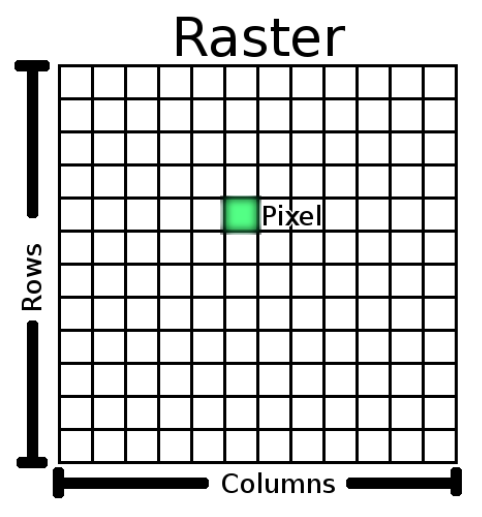
- Data raster mengasumsikan permukaan bumi sebagai grid/kisi dimana setiap grid tersusun atas pixel yang berisi nilai kontinu atau diskrit
- peta prediksi hujan dan peta tutupan lahan merupakan contoh data raster karena terdapat nilai pixel dalams setiap grid
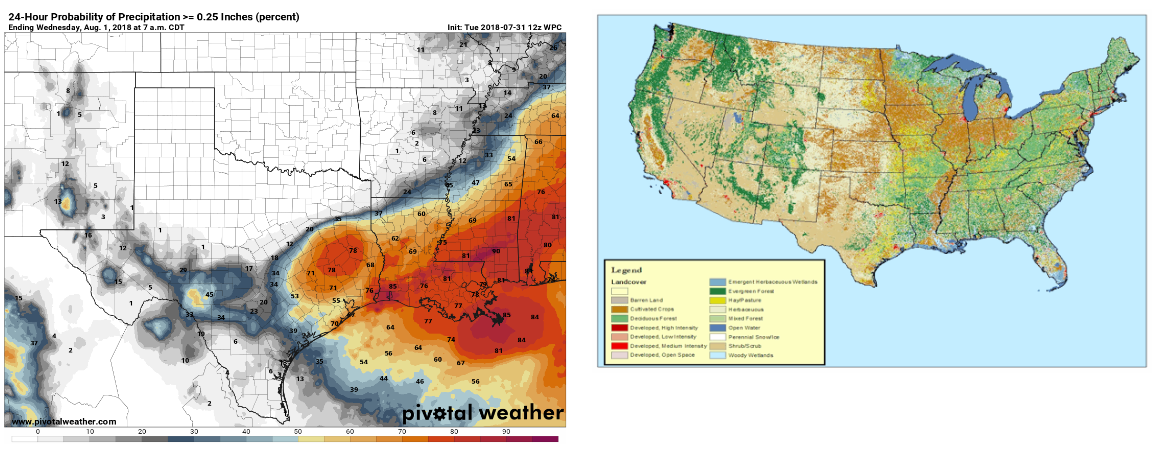

## Raster Data with Multiple Bands

- data raster dapat memiliki satu band warna, dimana setiap pixel hanya mewakili nilai tunggal seperti pada contoh sebelumnya.
- atau juga dapat memiliki banyak band warna seperti yang umum pada citra satelit yang ditunjukan pada gambar dibawah ini.
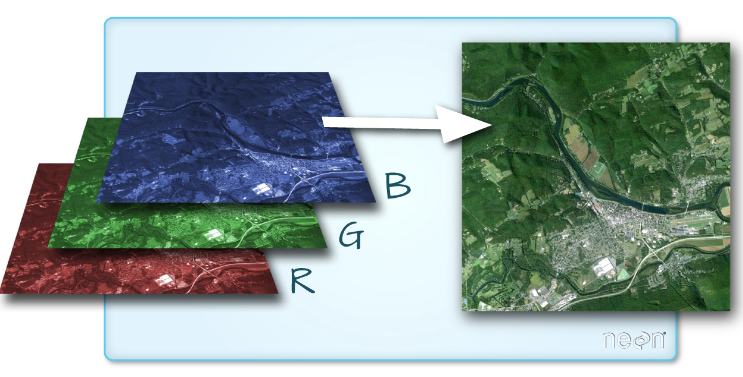

## Rasterio Package

Rasterio adalah pustaka Python yang digunakan untuk membaca, menulis, dan memproses data raster geospasial. Pustaka ini memungkinkan Anda untuk berinteraksi dengan berbagai format file raster, seperti TIFF, JPEG, dan banyak format raster geospasial lainnya. Berikut adalah penjelasan komprehensif tentang Rasterio:
- **Membaca Data Raster**: Salah satu fungsi utama Rasterio adalah membaca data raster dari berbagai format file. Anda dapat membaca citra satelit, peta topografi, data DEM (Digital Elevation Model), dan sebagainya. 

Contoh penggunaan:

In [151]:
import rasterio

In [ ]:
# with rasterio.open('contoh.tif') as src:
#     data = src.read()
#     crs = src.crs
#     transform = src.transform
#     # Membaca data dan metadata dari file raster

- **Menulis Data Raster:** Rasterio juga memungkinkan Anda untuk menulis atau menyimpan data raster ke berbagai format file. Misalnya, Anda dapat mengolah data dan menyimpan hasilnya ke dalam file raster baru.

In [152]:
# with rasterio.open('hasil.tif', 'w', driver='GTiff', width=cols, height=rows, count=1, dtype='float32', crs=crs) as dst:
#     dst.write(data, 1)  # Menulis data ke file raster baru

- **Metadata:** Rasterio menyediakan akses ke metadata yang terkait dengan data raster, seperti sistem referensi koordinat (CRS), transformasi geometri, dan informasi band (untuk citra multiband).

In [153]:
# crs = src.crs  # Mendapatkan CRS
# transform = src.transform  # Mendapatkan transformasi geometri
# band_count = src.count  # Mendapatkan jumlah band pada citra raster

- **Transformasi Koordinat:** Rasterio dapat digunakan untuk mengubah koordinat antara koordinat geografis dan koordinat piksel di dalam data raster. Transformasi geometri memungkinkan Anda untuk menghitung koordinat geografis berdasarkan koordinat piksel dan sebaliknya.

- **Proses dan Analisis Data:** Anda dapat menggunakan Rasterio bersama dengan NumPy atau pustaka lain untuk melakukan berbagai jenis analisis pada data raster, seperti ekstraksi nilai raster, perbandingan raster, dan transformasi data.

- **Interaksi dengan Pustaka Geospasial Lainnya:** Rasterio bekerja dengan baik dengan pustaka geospasial lainnya seperti GeoPandas, Shapely, dan Proj4. Ini memungkinkan integrasi yang mudah dengan analisis geospasial lebih lanjut.

- **Berbagai Format Raster:** Rasterio mendukung berbagai format raster, termasuk GeoTIFF (GTiff), JPEG, PNG, dan lebih banyak lagi.

- **Komunitas yang Aktif:** Rasterio memiliki komunitas yang aktif, sehingga Anda dapat menemukan banyak sumber daya dan dukungan online, termasuk dokumentasi resmi dan forum pengguna.

- **Kinerja yang Cepat:** Rasterio dirancang untuk kinerja yang cepat dan efisien dalam membaca dan menulis data raster besar.

- **Sumber Terbuka**: Rasterio adalah perangkat lunak sumber terbuka (open source), sehingga dapat digunakan secara gratis dan dikembangkan oleh komunitas.

Pustaka Rasterio sangat berguna dalam pemrosesan dan analisis data raster geospasial dalam lingkup pemrograman Python. Ini adalah alat yang kuat bagi para ilmuwan data, peneliti, dan profesional GIS yang bekerja dengan data raster dalam proyek geospasial mereka.

## Opening file

In [154]:
src = rasterio.open('dataset/IJEN.tif')

In [156]:
src.count # berapa banyak band file

1

In [157]:
src.width #lebar pixel

2666

In [158]:
src.height # tinggi pixel

2666

## Raster Data = Numpy Array

In [159]:
array = src.read()

In [160]:
array

array([[[337.4974 , 337.18887, 336.71014, ..., 537.52454, 541.0857 ,
         543.5111 ],
        [338.09128, 337.86288, 337.49234, ..., 538.53815, 542.35016,
         544.9642 ],
        [338.69733, 338.60422, 338.41794, ..., 539.65326, 543.57416,
         546.2576 ],
        ...,
        [591.7632 , 593.1767 , 594.74243, ..., 799.5276 , 800.0828 ,
         800.20166],
        [591.40765, 592.5838 , 593.84937, ..., 798.99866, 799.5218 ,
         799.604  ],
        [591.2663 , 592.2511 , 593.2429 , ..., 798.5555 , 799.071  ,
         799.15875]]], dtype=float32)

## Plotting Raster Dataset

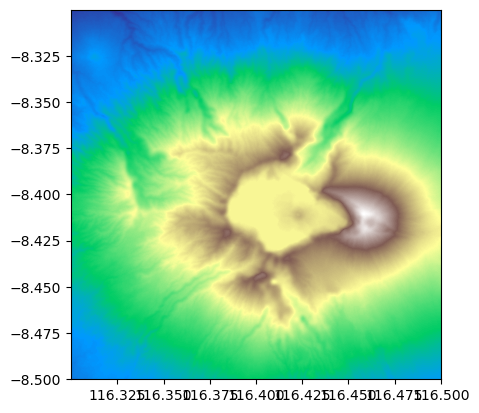

<Axes: >

In [161]:
import rasterio.plot

rasterio.plot.show(src, cmap = 'terrain')

## Extracting Information based on Vector Data

Untuk mengambil informasi dari data raster gunakan fungsi `.point_query()`

#### Untuk extract point vector

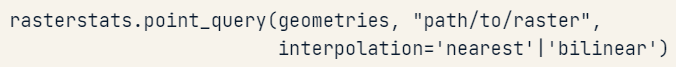

#### Untuk extract polygon vector

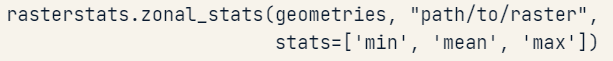